In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
latent_period = 4.59
latent_period_iCDF = [0, 0.098616903, 0.171170649,
                          0.239705594, 0.307516598,
                          0.376194441, 0.446827262,
                          0.520343677, 0.597665592,
                          0.679808341, 0.767974922,
                          0.863671993, 0.968878064,
                          1.086313899, 1.219915022,
                          1.37573215, 1.563841395,
                          1.803041398, 2.135346254,
                          2.694118208, 3.964172493]
CDF_RES = 20
time_steps_per_day = 1

In [3]:
def covidsim_latent(n):
    covid_sim_array = np.ones(n)

    for j in range(len(covid_sim_array)):
        q = random.random() * CDF_RES
        i = math.floor(q)
        q -= float(i)
        latent_time = 0.5 -\
        (latent_period * np.log(q * latent_period_iCDF[i + 1] +
        (1.0 - q) * latent_period_iCDF[i]) *
                time_steps_per_day)

        latent_time = math.floor(latent_time)
        covid_sim_array[j] = latent_time

    return covid_sim_array

In [4]:
def our_latent(n):
    our_latent_array = np.ones(n)

    for j in range(len(our_latent_array)):
        q = random.random() * CDF_RES
        i = math.floor(q)
        q -= float(i)
        latent_time = 0.5 +\
        (latent_period * q * latent_period_iCDF[i + 1] +
        (1.0 - q) * latent_period_iCDF[i] *
                time_steps_per_day)

        latent_time = math.floor(latent_time)
        our_latent_array[j] = latent_time

    return our_latent_array

In [14]:
covidsim = covidsim_latent(500)
ours = our_latent(500)

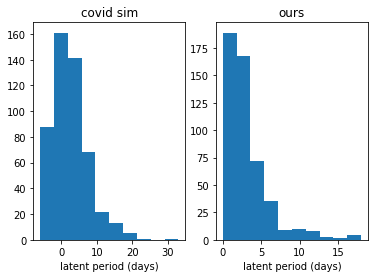

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(covidsim)
ax1.set_title('covid sim')
ax1.set_xlabel('latent period (days)')
ax2.hist(ours)
ax2.set_xlabel('latent period (days)')
ax2.set_title('ours')
plt.show()